# 衡量回归算法的标准

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 波士顿房产数据

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = boston.data[:, 5] # 只使用房间数量这个特征

In [6]:
x.shape

(506,)

In [7]:
y = boston.target

In [8]:
y.shape

(506,)

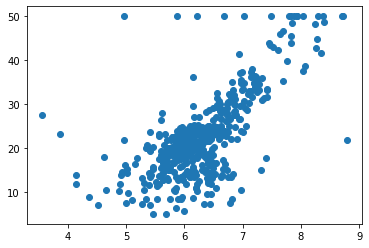

In [9]:
plt.scatter(x, y)
plt.show()

In [10]:
np.max(y)

50.0

In [11]:
x = x[y < 50.0] # 消除最大值，因为有可能这些值是因为比最大值还大
y = y[y < 50.0]

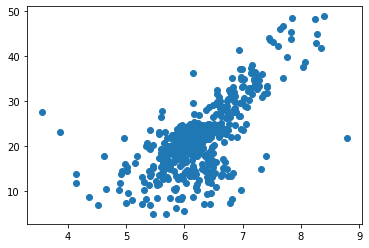

In [12]:
plt.scatter(x, y)
plt.show()

In [13]:
from playML.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [14]:
x_train.shape

(392,)

In [15]:
x_test.shape

(98,)

In [16]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

In [17]:
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegression2()

In [18]:
reg.a_

7.860854356268954

In [19]:
reg.b_

-27.459342806705536

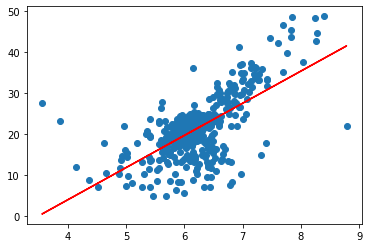

In [20]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [21]:
y_predict = reg.predict(x_test)

## MSE
$$
\frac{1}{m} \sum\limits_{i=1}^m (y{^{(i)}_{test}} - \hat y{^{(i)}_{test}})^2
$$

In [22]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.156602134387438

## RMSE
$$
\sqrt {\frac{1}{m} \sum\limits_{i=1}^m (y{^{(i)}_{test}} - \hat y{^{(i)}_{test}})^2}
$$

In [23]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

## MAE
$$
\frac{1}{m} \sum\limits_{i=1}^m |y{^{(i)}_{test}} - \hat y{^{(i)}_{test}}|
$$

In [24]:
mae_test = np.sum(np.absolute((y_predict - y_test))) / len(y_test)
mae_test

3.543097440946387

In [25]:
from playML.metrics import mean_squared_error
from playML.metrics import mean_absolute_error
from playML.metrics import root_mean_squared_error

In [26]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [27]:
mean_absolute_error(y_test, y_predict)

3.543097440946387

In [28]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

# scikit-learn中的MSE和MAE

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [30]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [31]:
mean_absolute_error(y_test, y_predict)

3.543097440946387

# R Square

In [32]:
1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.6129316803937322

In [33]:
from playML.metrics import r2_score
r2_score(y_test, y_predict)

0.6129316803937322

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.6129316803937324

In [35]:
reg.score(x_test, y_test)

0.6129316803937322